### Preprocessing_Raw Data

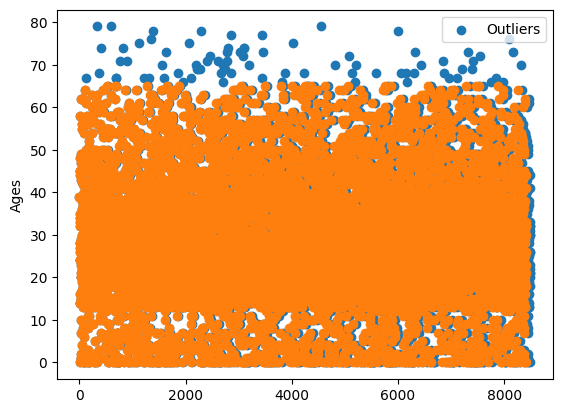

In [116]:
import numpy as np


import pandas as pd
import matplotlib.pylab as plt
from sklearn.ensemble import BaggingClassifier                           
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

data = pd.read_csv('/home/mahdi/Downloads/spaceship-titanic/train.csv')

def Preprocessing():

    global data

    data.dropna(subset=['Cabin'],axis=0 ,inplace=True)  
    P_S = [z[-1:] for z in data['Cabin']]
    data['Cabin'] = P_S
    data['Cabin'].replace({'P':1,'S':0},inplace=True)
    data.rename(columns={'Cabin':'P_or_S'} ,inplace=True)

    data['Transported'].replace({True:1, False:0},inplace=True)
    data = pd.get_dummies(data ,columns=['HomePlanet','Destination'] ,dtype=np.int16)  
    data = pd.get_dummies(data ,columns=['VIP'] ,drop_first=True ,dtype=np.int16)
    data['CryoSleep'].replace({True:1, False:0} ,inplace=True)

    data['Age'].fillna(data['Age'].median() ,inplace=True)  

    data.drop(['PassengerId','Name','Destination_PSO J318.5-22'],axis=1 ,inplace=True)

    for i in data.index:
        if data.loc[i,'CryoSleep'] == 1: 
            data.loc[i,'ShoppingMall'] = 0
            data.loc[i,'RoomService'] = 0
            data.loc[i,'FoodCourt'] = 0
            data.loc[i,'Spa'] = 0
            data.loc[i,'VRDeck'] = 0

    data['ShoppingMall'].fillna(data['ShoppingMall'].mean() ,inplace=True)
    data['RoomService'].fillna(data['RoomService'].mean() ,inplace=True)
    data['FoodCourt'].fillna(data['FoodCourt'].mean() ,inplace=True)
    data['Spa'].fillna(data['Spa'].mean() ,inplace=True)
    data['VRDeck'].fillna(data['VRDeck'].mean() ,inplace=True)


    for i in data.index:
        if (data.loc[i,'ShoppingMall'] + data.loc[i,'RoomService'] + data.loc[i,'FoodCourt']
            + data.loc[i,'Spa'] + data.loc[i,'VRDeck']) == 0:
            data.loc[i,'CryoSleep'] = 1
        else :
            data.loc[i,'CryoSleep'] = 0

    plt.scatter(range(len(data['Age'])), data['Age'],label='Outliers') 
    data = data[data['Age'] <= 65]
    plt.scatter(range(len(data['Age'])), data['Age'])
    plt.ylabel('Ages')
    plt.legend()

    y = data['Transported']                      
    del data['Transported']
    data['Transported'] = y

    data.reset_index(drop=True , inplace=True)  


Preprocessing()

### Preprocessing_Test

In [117]:
test = pd.read_csv('/home/mahdi/Downloads/spaceship-titanic/test.csv') 

def Preprocessing_test():
    
    global test

    test['Cabin'].iloc[:len(test['Cabin'])//2].fillna('0',inplace=True),test['Cabin'].fillna('1',inplace=True)
    P_S = [z[-1:] for z in test['Cabin']]
    test['Cabin'] = P_S
    test['Cabin'].replace({"0":0 ,'1':1 ,'P':0 ,'S':1},inplace=True)
    test.rename(columns={'Cabin':'P_or_S'} ,inplace=True)

    test = pd.get_dummies(test ,columns=['HomePlanet','Destination'] ,dtype=np.int16)  
    test = pd.get_dummies(test ,columns=['VIP'] ,drop_first=True ,dtype=np.int16)
    test['CryoSleep'].replace({True:1, False:0} ,inplace=True)

    test['Age'].fillna(data['Age'].median() ,inplace=True)  

    test.drop(['Name','Destination_PSO J318.5-22','PassengerId'],axis=1 ,inplace=True)

    test['CryoSleep'].fillna('A' ,inplace=True)
    for i in test.index:
        if (test.loc[i,'ShoppingMall'] + test.loc[i,'RoomService'] + test.loc[i,'FoodCourt']
            + test.loc[i,'Spa'] + test.loc[i,'VRDeck']) == 0 and (test.loc[i,'CryoSleep'] == 'A'):
            test.loc[i,'CryoSleep'] = 1
        test['CryoSleep'].replace({"A":0} ,inplace=True)

    for i in test.index:
        if test.loc[i,'CryoSleep'] == 1:
            test.loc[i,'ShoppingMall'] = 0
            test.loc[i,'RoomService'] = 0
            test.loc[i,'FoodCourt'] = 0
            test.loc[i,'Spa'] = 0
            test.loc[i,'VRDeck'] = 0

    test['ShoppingMall'].fillna(test['ShoppingMall'].mean() ,inplace=True)
    test['RoomService'].fillna(test['RoomService'].mean() ,inplace=True)
    test['FoodCourt'].fillna(test['FoodCourt'].mean() ,inplace=True)
    test['Spa'].fillna(test['Spa'].mean() ,inplace=True)
    test['VRDeck'].fillna(test['VRDeck'].mean() ,inplace=True)


Preprocessing_test()

### Modeling

In [118]:
def Normalization():  
    global F_train ,T_train ,F_Test ,T_Test

    x_train , x_test = train_test_split(data ,test_size=0.2 ,random_state=42)
 
    Normalizer = MinMaxScaler()  
    Data_Normalized = Normalizer.fit_transform(x_train)
    F_train = Data_Normalized[:,:-1]
    T_train = Data_Normalized[:,-1:]

    Test_Normalized = Normalizer.transform(x_test)
    F_Test = Test_Normalized[:,:-1]
    T_Test = Test_Normalized[:,-1:]


def Model():
    global model

    gradient = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_depth=2)  
    model = BaggingClassifier(estimator=gradient, n_estimators=25, max_samples=0.8, n_jobs=5 ,random_state=42)
    model.fit(F_train ,T_train.ravel())


def Evaluate():
    return model.score(F_Test ,T_Test)


Normalization()

Model()

Evaluate()

0.809863339275104